# Analisis Exploratorio de datos

In [170]:
# Importar las librerias correspondientes para el analisis
import pandas as pd
import ast
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import missingno as msno
from collections import Counter



In [171]:
# Extraer los datos de los dataframe
credits_df_parquet = pd.read_parquet('Datasets/credits_dataset_parquet')
movies_df_parquet = pd.read_parquet('Datasets/movies_dataset_parquet')

### 1. vision general de los datos 

In [172]:
# Obtener una descripcion estadistica general de las variables numericas y categoricas de 'movies_df_parquet'
movies_df_parquet.describe(include='all')


,budget,id_movies,original_language,overview,popularity,release_date,revenue,runtime,status,tagline,...,id_belongs_to_collection,name_belongs_to_collection,id_production_companies,name_production_companies,iso_spoken_language,name_spoken_language,iso_production_countries,name_production_countries,id_genre,name_genre
count,4.534600e+04,45346.000000,45335,44405,45346.000000,45346,4.534600e+04,45100.000000,45266,20387,...,4485.000000,4485,33557.000000,33557,45346,45346,39138,39138,45346.000000,45346
unique,NaN,NaN,89,44232,NaN,NaN,NaN,NaN,6,20269,...,NaN,1695,NaN,10611,116,71,143,143,NaN,21
top,NaN,NaN,en,No overview found.,NaN,NaN,NaN,NaN,Released,Based on a true story.,...,NaN,The Bowery Boys,NaN,Paramount Pictures,en,English,US,United States of America,NaN,Drama
freq,NaN,NaN,32184,133,NaN,NaN,NaN,NaN,44907,7,...,NaN,29,NaN,996,26808,26808,18410,18410,NaN,11948
mean,4.232580e+06,108042.219645,NaN,NaN,2.926151,1992-05-16 07:38:33.253649664,1.123366e+07,94.177805,NaN,NaN,...,184146.038796,NaN,10651.203326,NaN,NaN,NaN,NaN,NaN,888.315110,NaN
min,0.000000e+00,2.000000,NaN,NaN,0.000000,1874-12-09 00:00:00,0.000000e+00,0.000000,NaN,NaN,...,10.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN
25%,0.000000e+00,26390.250000,NaN,NaN,0.390000,1978-10-06 00:00:00,0.000000e+00,85.000000,NaN,NaN,...,86027.000000,NaN,516.000000,NaN,NaN,NaN,NaN,NaN,18.000000,NaN
50%,0.000000e+00,59852.500000,NaN,NaN,1.130000,2001-08-30 00:00:00,0.000000e+00,95.000000,NaN,NaN,...,141615.000000,NaN,3965.000000,NaN,NaN,NaN,NaN,NaN,28.000000,NaN
75%,0.000000e+00,156601.500000,NaN,NaN,3.690000,2010-12-17 00:00:00,0.000000e+00,107.000000,NaN,NaN,...,294172.000000,NaN,10330.000000,NaN,NaN,NaN,NaN,NaN,37.000000,NaN
max,3.800000e+08,469172.000000,NaN,NaN,547.490000,2020-12-16 00:00:00,2.787965e+09,1256.000000,NaN,NaN,...,480160.000000,NaN,96067.000000,NaN,NaN,NaN,NaN,NaN,10770.000000,NaN


In [173]:
# Obtener una descripcion estadistica general de las variables numericas y categoricas de 'credits_df_parquet'
credits_df_parquet.describe(include='all')

,id_credits,cast_id,cast_character,cast_credit_id,cast_gender,cast_id_actor,cast_name_actor,cast_order_credit,crew_credit_id,crew_department,crew_gender,crew_id_member,crew_job,crew_name_member,crew_profile_path_member
count,45432.000000,43018.000000,43018,43018,45432.000000,4.301800e+04,43018,43018.000000,44661,44661,45432.000000,4.466100e+04,44661,44661,21443
unique,NaN,NaN,30408,43018,NaN,NaN,18373,NaN,44661,12,NaN,NaN,190,20632,6314
top,NaN,NaN,,52fe4284c3a36847f8024f95,NaN,NaN,John Wayne,NaN,52fe4284c3a36847f8024f49,Directing,NaN,NaN,Director,Avy Kaufman,/yQPGktsmkKkhkOQAUlmYlxHJOiJ.jpg
freq,NaN,NaN,1702,1,NaN,NaN,94,NaN,1,25553,NaN,NaN,25506,124,124
mean,108368.766750,45.349691,NaN,NaN,1.260235,2.029392e+05,NaN,0.164420,NaN,NaN,1.181128,2.221097e+05,NaN,NaN,NaN
std,112472.571213,199.737906,NaN,NaN,0.848397,4.004408e+05,NaN,0.544294,NaN,NaN,0.948945,4.091570e+05,NaN,NaN,NaN
min,2.000000,0.000000,NaN,NaN,0.000000,1.000000e+00,NaN,0.000000,NaN,NaN,0.000000,1.000000e+00,NaN,NaN,NaN
25%,26459.250000,1.000000,NaN,NaN,0.000000,9.309000e+03,NaN,0.000000,NaN,NaN,0.000000,8.108000e+03,NaN,NaN,NaN
50%,59995.500000,2.000000,NaN,NaN,2.000000,3.791700e+04,NaN,0.000000,NaN,NaN,2.000000,4.564500e+04,NaN,NaN,NaN
75%,157350.250000,5.000000,NaN,NaN,2.000000,1.103492e+05,NaN,0.000000,NaN,NaN,2.000000,1.273880e+05,NaN,NaN,NaN


In [174]:
# revisar el nombre de las columnas de movies_df_parquet y su tipo de datos
print(movies_df_parquet.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45346 entries, 0 to 45345
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   budget                      45346 non-null  int64         
 1   id_movies                   45346 non-null  int64         
 2   original_language           45335 non-null  object        
 3   overview                    44405 non-null  object        
 4   popularity                  45346 non-null  float64       
 5   release_date                45346 non-null  datetime64[ns]
 6   revenue                     45346 non-null  float64       
 7   runtime                     45100 non-null  float64       
 8   status                      45266 non-null  object        
 9   tagline                     20387 non-null  object        
 10  title                       45346 non-null  object        
 11  vote_average                45346 non-null  float64   

In [175]:
# revisar el nombre de las columnas de credits_df_parquet y su tipo de datos
print(credits_df_parquet.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id_credits                45432 non-null  int64  
 1   cast_id                   43018 non-null  float64
 2   cast_character            43018 non-null  object 
 3   cast_credit_id            43018 non-null  object 
 4   cast_gender               45432 non-null  float64
 5   cast_id_actor             43018 non-null  float64
 6   cast_name_actor           43018 non-null  object 
 7   cast_order_credit         43018 non-null  float64
 8   crew_credit_id            44661 non-null  object 
 9   crew_department           44661 non-null  object 
 10  crew_gender               45432 non-null  float64
 11  crew_id_member            44661 non-null  float64
 12  crew_job                  44661 non-null  object 
 13  crew_name_member          44661 non-null  object 
 14  crew_p

### 2. Graficar los datos faltantes

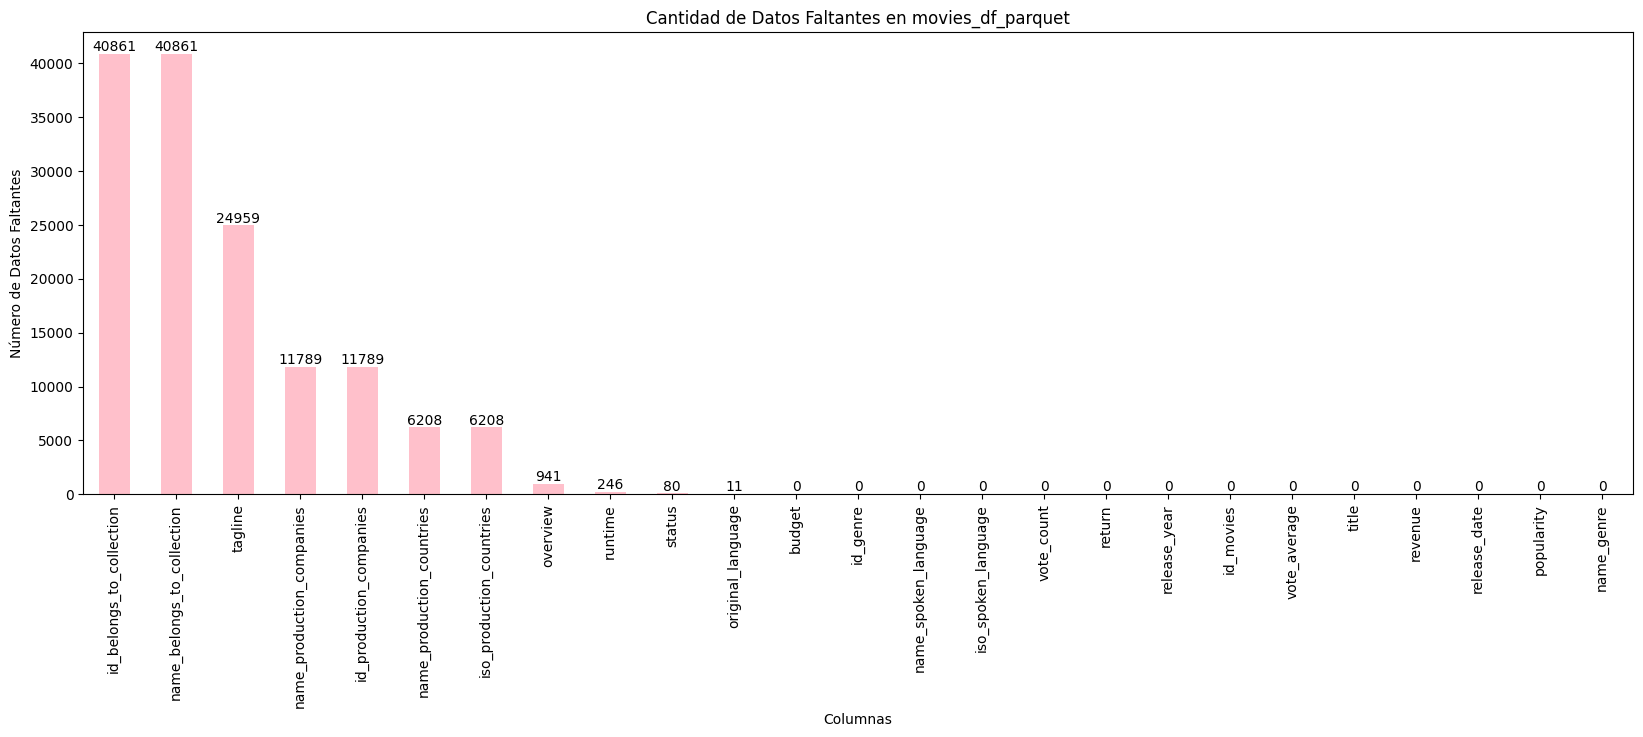

In [176]:
# Cantidad de valores faltantes en cada columna
datos_faltantes_movies = movies_df_parquet.isnull().sum()

# Graficar datos faltantes en `movies_df_parquet`
plt.figure(figsize=(20, 6))
ax = datos_faltantes_movies.sort_values(ascending=False).plot(kind='bar', color='pink')

# Añadir etiquetas de cantidad en el gráfico
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Cantidad de Datos Faltantes en movies_df_parquet')
plt.xlabel('Columnas')
plt.ylabel('Número de Datos Faltantes')
plt.xticks(rotation=90)
plt.show()

In [177]:
# calcular el porcentaje de datos faltantes en cada columna
datos_faltantes_movies_porcentaje = movies_df_parquet.isnull().mean() * 100
print(datos_faltantes_movies_porcentaje)

budget                         0.000000
id_movies                      0.000000
original_language              0.024258
overview                       2.075155
popularity                     0.000000
release_date                   0.000000
revenue                        0.000000
runtime                        0.542495
status                         0.176421
tagline                       55.041238
title                          0.000000
vote_average                   0.000000
vote_count                     0.000000
release_year                   0.000000
return                         0.000000
id_belongs_to_collection      90.109381
name_belongs_to_collection    90.109381
id_production_companies       25.997883
name_production_companies     25.997883
iso_spoken_language            0.000000
name_spoken_language           0.000000
iso_production_countries      13.690292
name_production_countries     13.690292
id_genre                       0.000000
name_genre                     0.000000


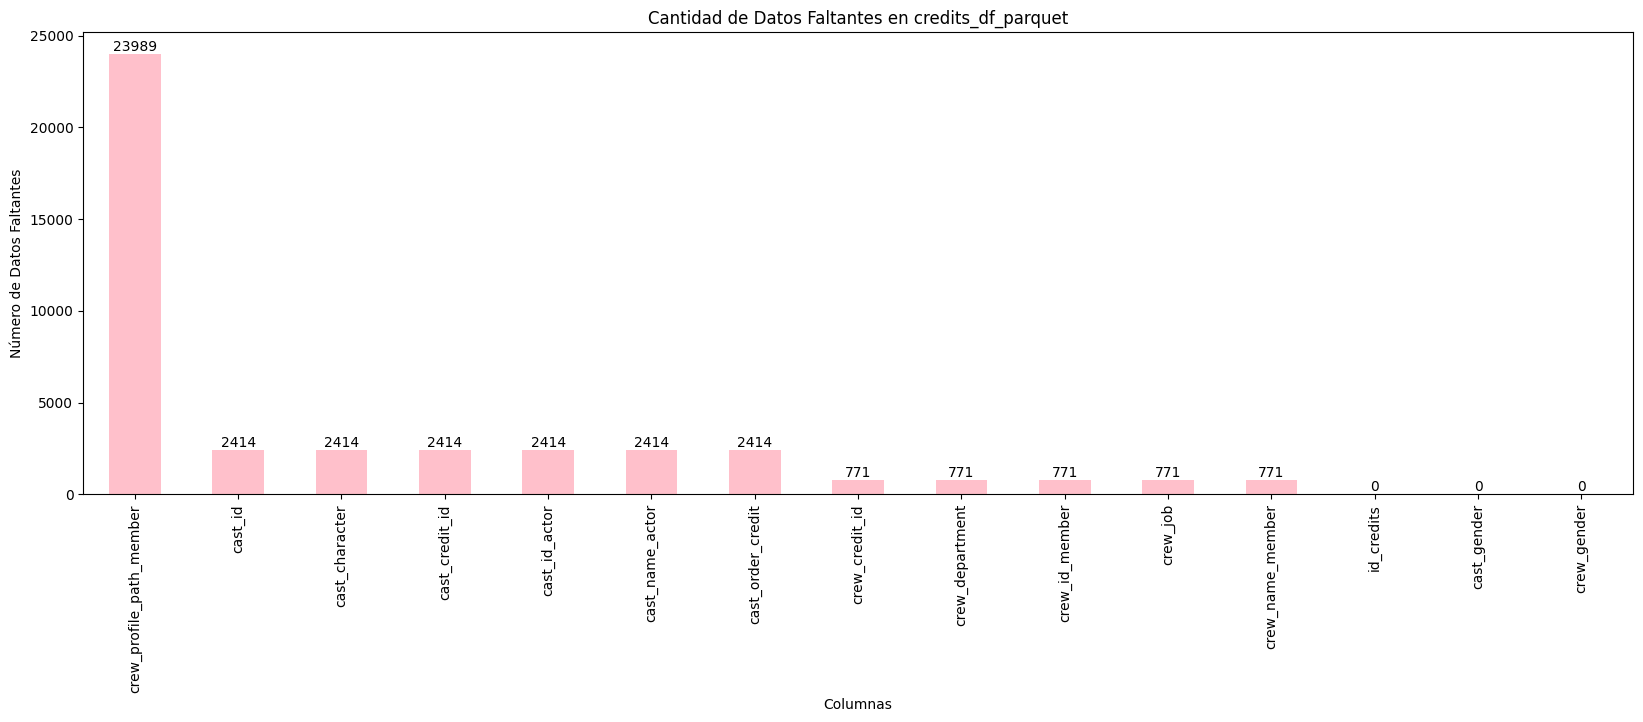

In [178]:
# Cantidad de valores faltantes en cada columna
datos_faltantes_credits = credits_df_parquet.isnull().sum()

# Graficar datos faltantes en `movies_df_parquet`
plt.figure(figsize=(20, 6))
ax = datos_faltantes_credits.sort_values(ascending=False).plot(kind='bar', color='pink')

# Añadir etiquetas de cantidad en el gráfico
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Cantidad de Datos Faltantes en credits_df_parquet')
plt.xlabel('Columnas')
plt.ylabel('Número de Datos Faltantes')
plt.xticks(rotation=90)
plt.show()

In [179]:
# calcular el porcentaje de datos faltantes en cada columna
datos_faltantes_credits_porcentaje = credits_df_parquet.isnull().mean() * 100
print(datos_faltantes_credits_porcentaje)

id_credits                   0.000000
cast_id                      5.313435
cast_character               5.313435
cast_credit_id               5.313435
cast_gender                  0.000000
cast_id_actor                5.313435
cast_name_actor              5.313435
cast_order_credit            5.313435
crew_credit_id               1.697042
crew_department              1.697042
crew_gender                  0.000000
crew_id_member               1.697042
crew_job                     1.697042
crew_name_member             1.697042
crew_profile_path_member    52.801990
dtype: float64


#### Revisando los graficos se toma la decision de quitar las columnas donde sus datos faltantes sean mayores al 10%, ademas se observa que estas columnas tampoco van a ser significativas al momento de realizar el modelo

In [180]:
# Identificar columnas con más del 10% de datos faltantes
columns_a_eliminar_movies = datos_faltantes_movies_porcentaje[datos_faltantes_movies_porcentaje > 10].index

# Eliminar las columnas identificadas
movies_df_parquet_EDA = movies_df_parquet.drop(columns=columns_a_eliminar_movies)

# Mostrar las columnas eliminadas y el nuevo DataFrame
print("Columnas eliminadas:")
print(columns_a_eliminar_movies)

print("\nNuevo DataFrame:")
print(movies_df_parquet_EDA.info())




Columnas eliminadas:
Index(['tagline', 'id_belongs_to_collection', 'name_belongs_to_collection',
       'id_production_companies', 'name_production_companies',
       'iso_production_countries', 'name_production_countries'],
      dtype='object')

Nuevo DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45346 entries, 0 to 45345
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   budget                45346 non-null  int64         
 1   id_movies             45346 non-null  int64         
 2   original_language     45335 non-null  object        
 3   overview              44405 non-null  object        
 4   popularity            45346 non-null  float64       
 5   release_date          45346 non-null  datetime64[ns]
 6   revenue               45346 non-null  float64       
 7   runtime               45100 non-null  float64       
 8   status                45266 non-null  obj

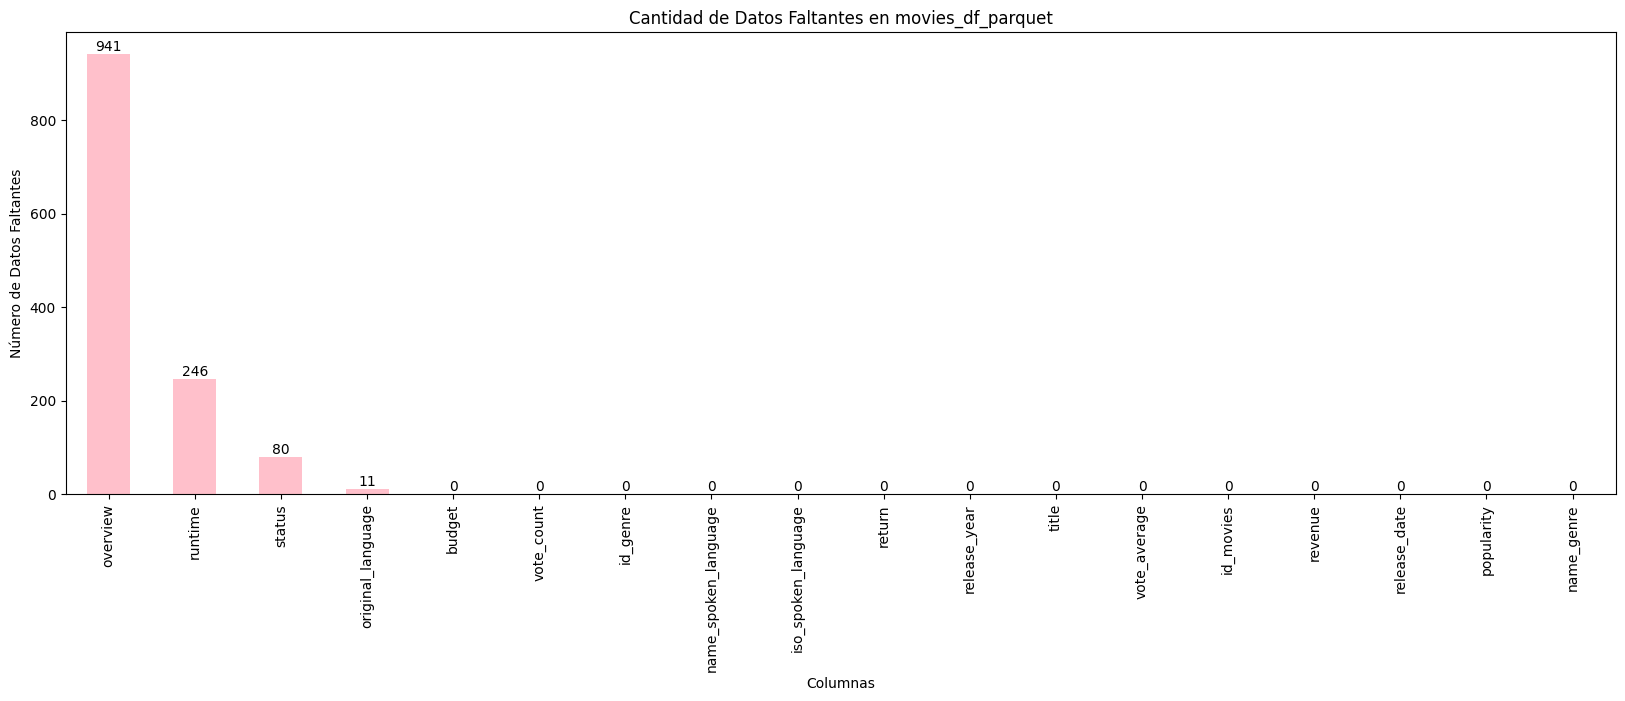

In [181]:
# Cantidad de valores faltantes en cada columna
datos_faltantes_movies = movies_df_parquet_EDA.isnull().sum()

# Graficar nuevamente los datos faltantes
plt.figure(figsize=(20, 6))
ax = datos_faltantes_movies.sort_values(ascending=False).plot(kind='bar', color='pink')

# Añadir etiquetas de cantidad en el gráfico
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Cantidad de Datos Faltantes en movies_df_parquet')
plt.xlabel('Columnas')
plt.ylabel('Número de Datos Faltantes')
plt.xticks(rotation=90)
plt.show()

In [182]:
# Identificar columnas con más del 10% de datos faltantes en credits_df_parquet
columns_a_eliminar_credits = datos_faltantes_credits_porcentaje[datos_faltantes_credits_porcentaje > 10].index

# Eliminar las columnas identificadas
credits_df_parquet_EDA = credits_df_parquet.drop(columns=columns_a_eliminar_credits)


# Mostrar las columnas eliminadas y el nuevo DataFrame
print(columns_a_eliminar_credits)

print("\nNuevo DataFrame:")
print(credits_df_parquet_EDA.info())

Index(['crew_profile_path_member'], dtype='object')

Nuevo DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45432 entries, 0 to 45431
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id_credits         45432 non-null  int64  
 1   cast_id            43018 non-null  float64
 2   cast_character     43018 non-null  object 
 3   cast_credit_id     43018 non-null  object 
 4   cast_gender        45432 non-null  float64
 5   cast_id_actor      43018 non-null  float64
 6   cast_name_actor    43018 non-null  object 
 7   cast_order_credit  43018 non-null  float64
 8   crew_credit_id     44661 non-null  object 
 9   crew_department    44661 non-null  object 
 10  crew_gender        45432 non-null  float64
 11  crew_id_member     44661 non-null  float64
 12  crew_job           44661 non-null  object 
 13  crew_name_member   44661 non-null  object 
dtypes: float64(6), int64(1), object(7)
memory usage:

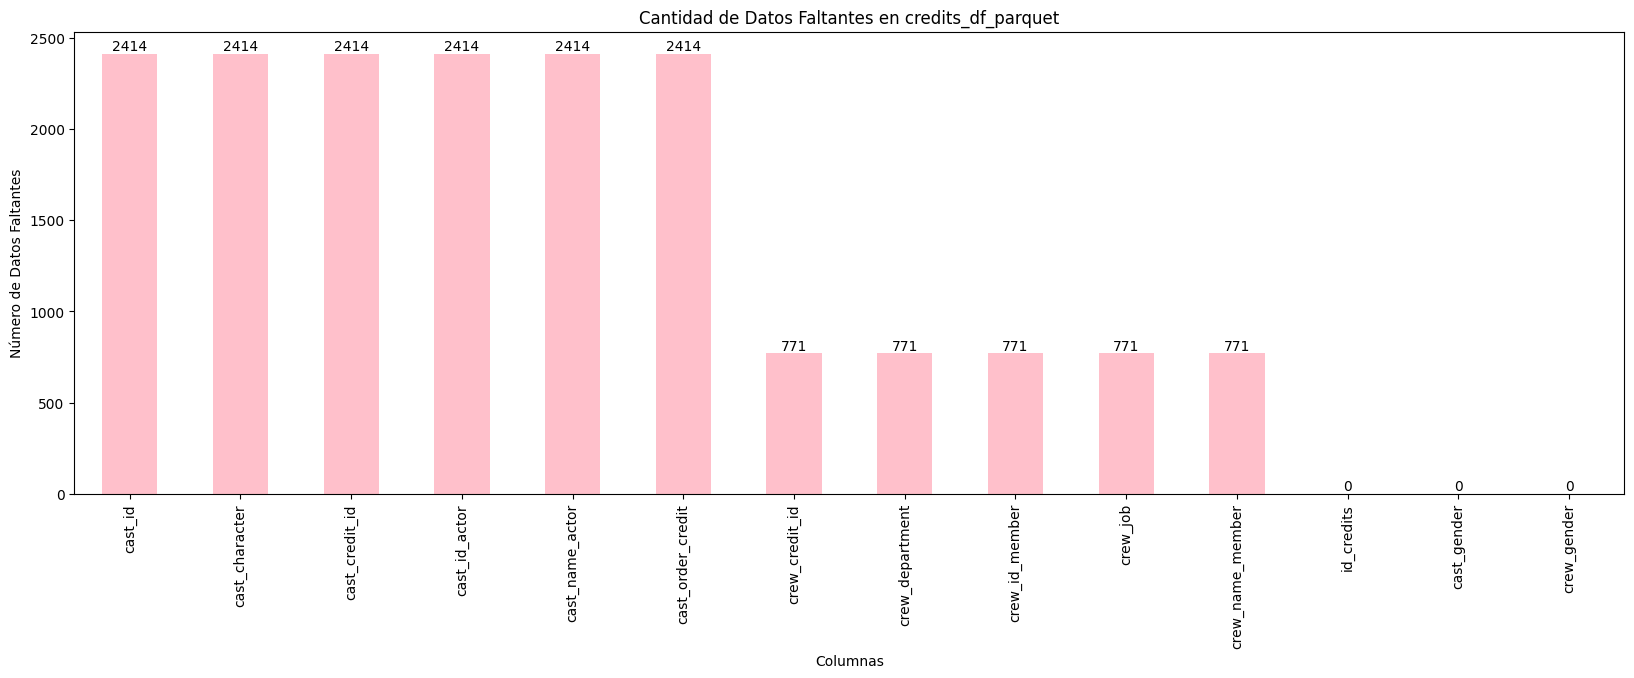

In [183]:
# Cantidad de valores faltantes en cada columna
datos_faltantes_credits = credits_df_parquet_EDA.isnull().sum()

# Graficar datos faltantes en `movies_df_parquet`
plt.figure(figsize=(20, 6))
ax = datos_faltantes_credits.sort_values(ascending=False).plot(kind='bar', color='pink')

# Añadir etiquetas de cantidad en el gráfico
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

plt.title('Cantidad de Datos Faltantes en credits_df_parquet')
plt.xlabel('Columnas')
plt.ylabel('Número de Datos Faltantes')
plt.xticks(rotation=90)
plt.show()

### 3. Observar y mejorar la distribucion en movies_df_parquet_EDA

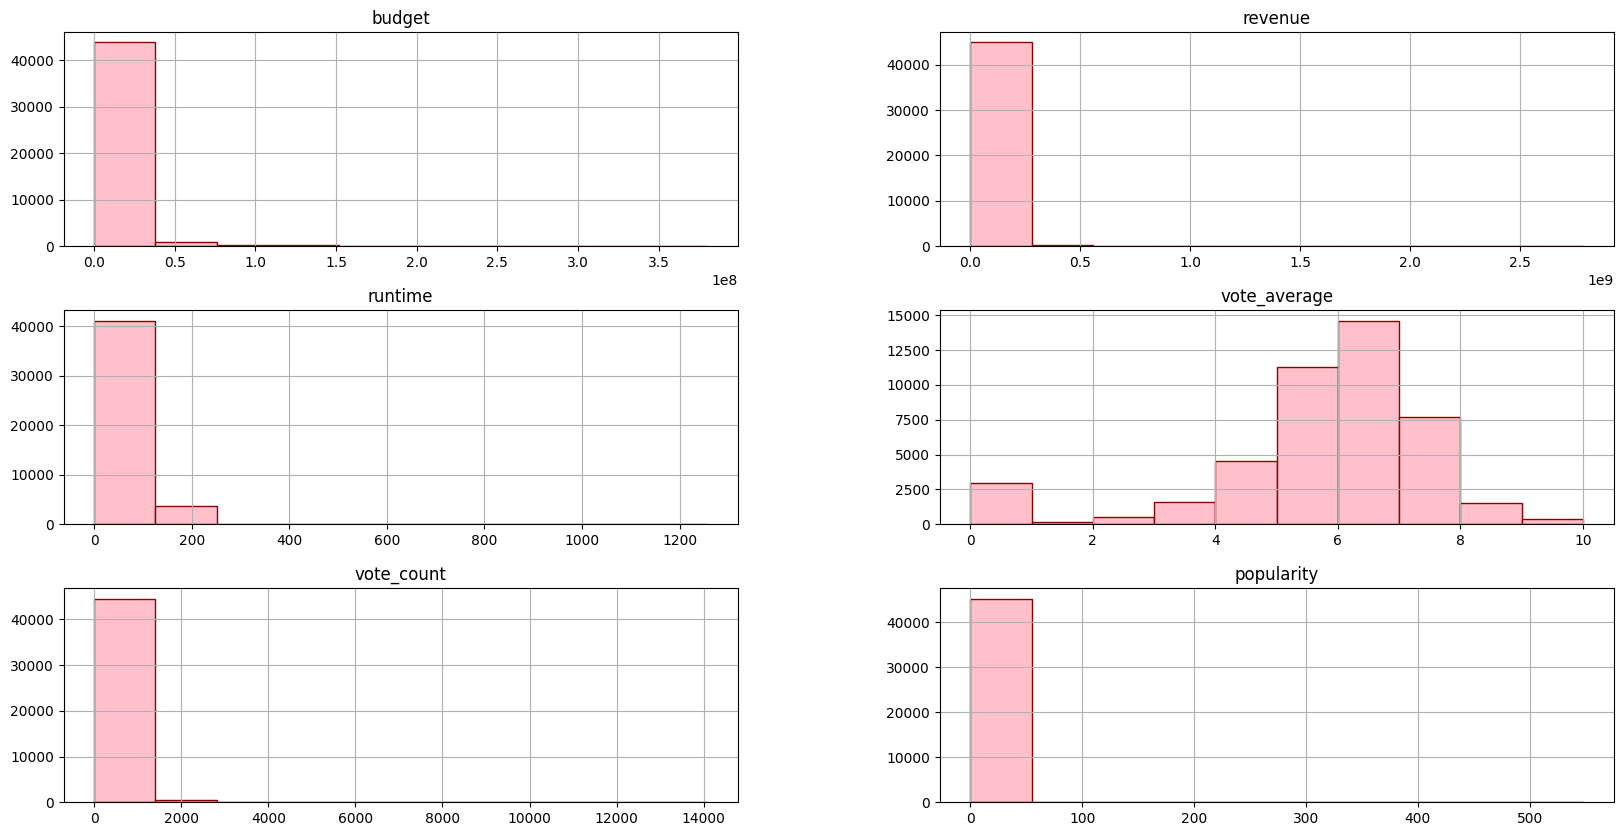

In [184]:
# Hacer histogramas para ver la distribucion de las variables numéricas en 'movies_df_parquet_EDA'
movies_df_parquet_EDA[['budget', 'revenue', 'runtime', 'vote_average', 'vote_count','popularity']].hist(
    figsize=(20, 10),
    color='pink',
    edgecolor='darkred'
)

plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Análisis de cada histograma:

* budget (presupuesto):

Eje X: Representa los valores del presupuesto de las peliculas (en una escala grande, dado que hay peliculas con presupuestos multimillonarios).
Eje Y: Representa la cantidad de peliculas con un presupuesto específico.
Observación: La mayoria de las peliculas tienen un presupuesto bajo, concentrándose en el lado izquierdo del gráfico. Hay muy pocas peliculas con presupuestos extremadamente altos, Lo que explica el sesgo positivo a la derecha

* revenue (recaudacion):

Eje X: Representa los ganancias en dólares.
Eje Y: Representa la cantidad de peliculas con ciertos niveles de ganancias.
Observación: Similar al presupuesto, la mayoria de las peliculas tienen ganancias bajas, con unas pocas excepciones de peliculas con ingresos muy altos, Lo que explica el sesgo positivo a la derecha

* runtime (duracion):

Eje X: Tiempo de duracion de las peliculas en minutos.
Eje Y: Numero de peliculas con esa duracion.
Observación: La mayoria de las peliculas duran entre 90 y 200 minutos, con muy pocas peliculas con duraciones extremas, Lo que explica el sesgo positivo a la derecha

* vote_average (promedio de votos):

Eje X: Puntuación media que han recibido las peliculas (de 0 a 10).
Eje Y: Numero de peliculas que han recibido cierto promedio de votos.
Observación: La mayoria de las peliculas tiene un promedio de entre 6 y 8, lo cual sugiere que muchas peliculas obtienen una valoración media o ligeramente superior, se podria hablar 
de un histograma bimodal al tener dos picos uno en el 0 y el siguiente entre 6 y 7 de promedio de votos.

* vote_count (cantidad de votos):

Eje X: Numero de votos recibidos.
Eje Y: Frecuencia de peliculas con un cierto numero de votos.
Observación: La mayoria de las peliculas tienen pocos votos, con unas pocas peliculas extremadamente votadas, Lo que explica el sesgo positivo a la derecha.

* popularity (popularidad):

Eje X: Mide la popularidad de las peliculas.
Eje Y: Frecuencia de peliculas según su nivel de popularidad.
Observación: La popularidad se concentra en el lado izquierdo, lo que indica que la mayoria de las películas tienen una popularidad baja, con solo unas pocas películas siendo altamente populares, Lo que explica el sesgo positivo a la derecha.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

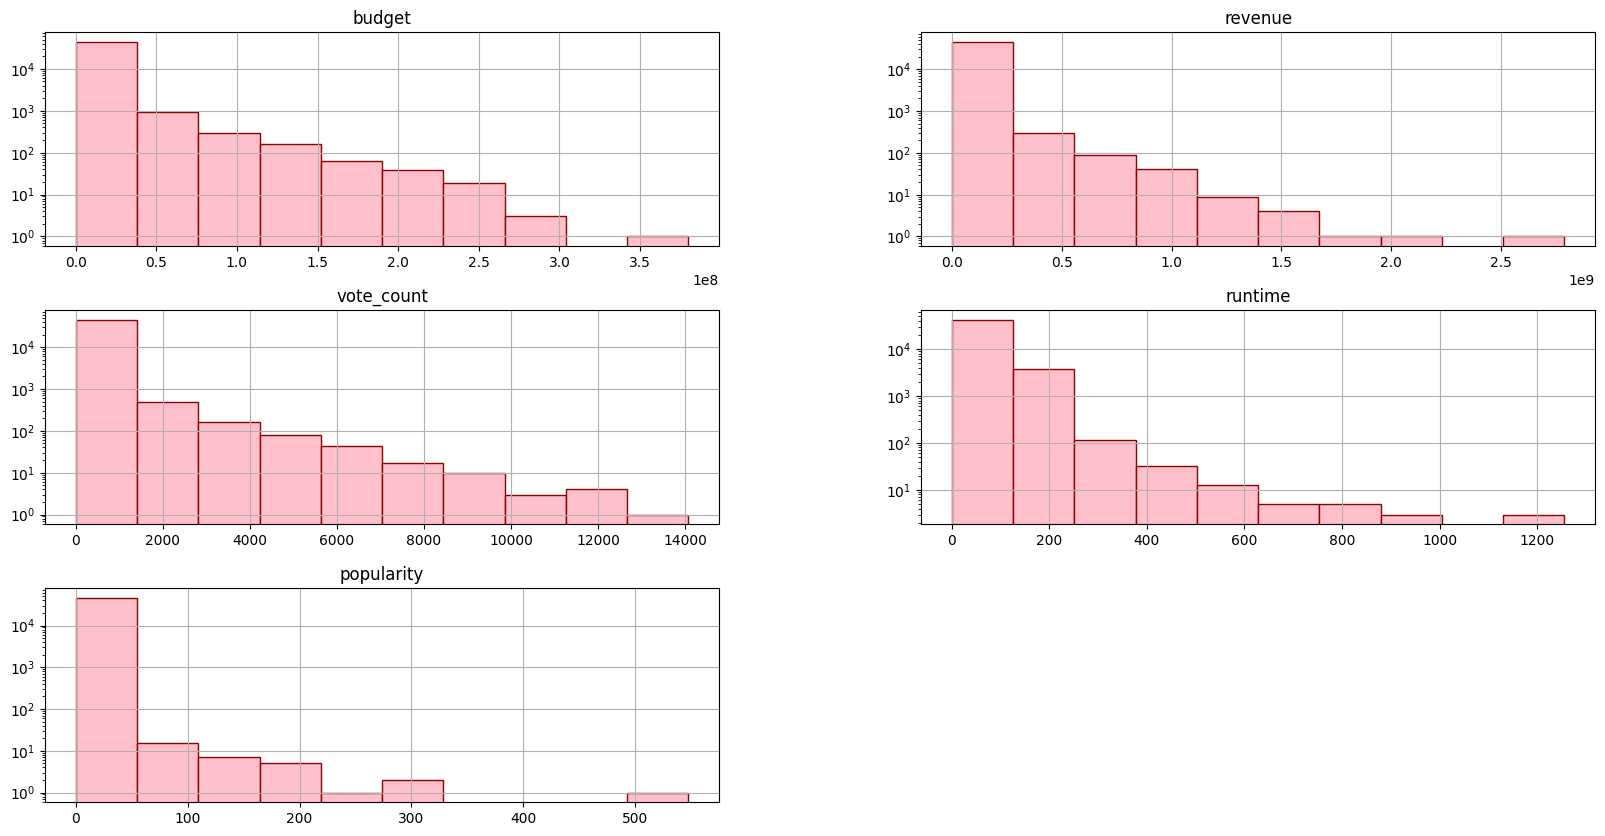

In [185]:
# Al observar el sesgo en los histogramas anteriores se decidio hacerlos de nuevo con una escala logaritmica para una mejor visualizacion.
movies_df_parquet_EDA[['budget', 'revenue', 'vote_count','runtime','popularity']].hist(
    figsize=(20, 10), 
    log=True, 
    color='pink', 
    edgecolor='darkred'
)

plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

* Se pueden observar mejor los sesgos y tambien el hecho de que algunas columnas poseen outliers a verificar

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 4. Verificacion de los outliers para movies_df_parquet_EDA

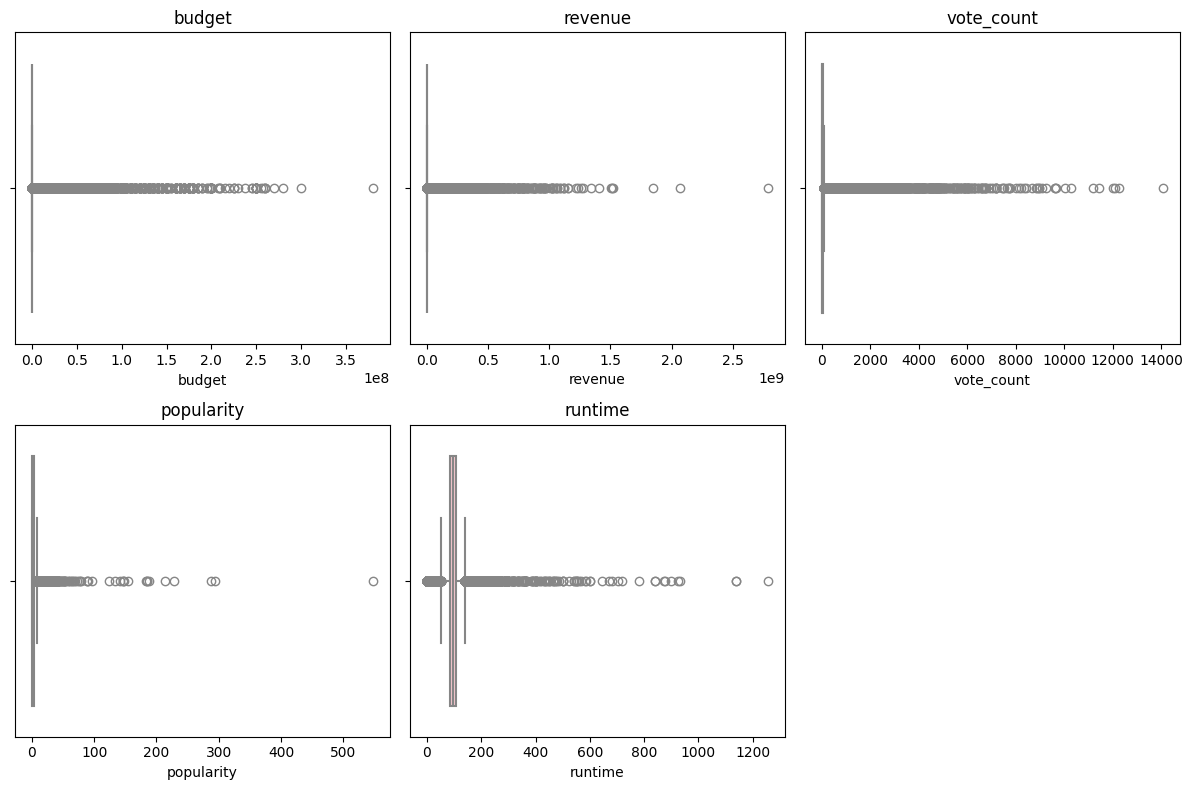

In [187]:
# Especificar las columnas a verificar
columns_a_verificar = ['budget', 'revenue', 'vote_count' , 'popularity', 'runtime']

# Crear subplots para mostrar multiples boxplots
plt.figure(figsize=(12, 8))

# Crear un boxplot para cada columna especificada
for i, column in enumerate(columns_a_verificar, 1):
    plt.subplot(2, 3, i)  # Ajusta el número de filas y columnas (2 filas y 3 columnas)
    sns.boxplot(x=movies_df_parquet_EDA[column], color='pink', linewidth=1.5)
    plt.title(column)

plt.tight_layout()  # Asegura que los gráficos no se superpongan
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Analisis de los outliers:

* Budget (Presupuesto):
El boxplot muestra una gran cantidad de valores atípicos (outliers) en el extremo superior.
La mayoría de las películas tienen presupuestos relativamente bajos, pero hay algunas con presupuestos extremadamente altos que están marcadas como puntos fuera del rango.
El valor máximo parece estar alrededor de 3.5e8 (350 millones de dólares).
observacion: revisando los datos con 

* Revenue (Ganancia):
Similar al presupuesto, los ingresos muestran un patrón con muchos valores atípicos. Las películas que tienen ingresos extremadamente altos también están fuera del rango de los ingresos típicos.
La mayor parte de las películas no generan tanto dinero, pero algunas películas han generado ingresos de hasta 2.5e9 (2.5 mil millones de dólares).

* Vote Count (Número de votos):
El número de votos presenta una distribución bastante sesgada, donde la mayoría de las películas tienen un número de votos relativamente bajo.
Los outliers también están presentes, lo que indica que hay películas que han recibido un número significativamente mayor de votos que otras (algunas hasta 14,000 votos).

* Runtime (Duración):
Aquí podemos ver que la duración de la mayoría de las películas se concentra en un rango típico entre 90 y 120 minutos.
Los valores atípicos (outliers) incluyen películas con una duración superior a 300 minutos, como mencionaste antes con el ejemplo de Napoleón.
Se confirma que las películas de más de 332 minutos son outliers y deberían ser miniseries o casos especiales.

* Popularity (Popularidad):
La mayoría de las películas tienen una popularidad muy baja, con valores cercanos a cero.
Sin embargo, hay algunas películas que tienen una popularidad extremadamente alta, con un valor máximo cercano a 500.
Esto indica una variabilidad significativa en los niveles de popularidad entre las películas.

* Conclusión:
Todos los gráficos muestran que los datos tienen muchos outliers, especialmente en columnas como budget, revenue, vote_count, y popularity. Los valores extremos podrían sesgar los análisis si no se manejan adecuadamente. En el caso de la columna runtime, como ya identificaste, es importante considerar eliminar o tratar las películas de larga duración como posibles outliers (miniseries o versiones extendidas).

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [188]:
# Ordenar el DataFrame por el presupuesto en orden descendente
top_budgets_df = movies_df_parquet_EDA.sort_values(by='budget', ascending=False)

# Seleccionar las 10 primeras filas
top_10_budgets_df = top_budgets_df.head(10)

# Obtener los títulos de las 10 películas con el presupuesto más alto
top_10_titles = top_10_budgets_df['title'].tolist()

print(top_10_titles)

['Pirates of the Caribbean: On Stranger Tides', "Pirates of the Caribbean: At World's End", 'Avengers: Age of Ultron', 'Superman Returns', 'Tangled', 'John Carter', 'Transformers: The Last Knight', 'Spider-Man 3', 'The Lone Ranger', 'Captain America: Civil War']


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

* Conclusión sobre los Outliers de la columna budget (Presupuesto)

Aunque los outliers en el presupuesto introducen un sesgo, se mantendrán en el análisis porque representan películas exitosas como Avengers, Pirates of the Caribbean, Spiderman, entre otras. Estos datos son cruciales para entender el impacto del presupuesto en el éxito y la industria cinematográfica en general.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [189]:
# Ordenar el DataFrame por la ganancia en orden descendente
top_Revenue_df = movies_df_parquet_EDA.sort_values(by='revenue', ascending=False)

# Seleccionar las 10 primeras filas
top_10_revenues_df = top_Revenue_df.head(10)

# Obtener los títulos de las 10 películas con el presupuesto más alto
top_10_titles = top_10_revenues_df['title'].tolist()

print(top_10_titles)

['Avatar', 'Star Wars: The Force Awakens', 'Titanic', 'The Avengers', 'Jurassic World', 'Furious 7', 'Avengers: Age of Ultron', 'Harry Potter and the Deathly Hallows: Part 2', 'Frozen', 'Beauty and the Beast']


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

* Conclusión sobre los Outliers de la columna revenue (Ganancia)

Aunque los outliers en las Ganancias introducen un sesgo, se mantendrán en el análisis porque representan películas exitosas como Avatar, Star wars, Titanic, entre otras. Estos datos son fundamentales para comprender el impacto de los ingresos en el éxito y la influencia de las grandes producciones en la industria cinematográfica.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [190]:
# Ordenar el DataFrame por el conteno de votaciones en orden descendente
top_vote_count_df = movies_df_parquet_EDA.sort_values(by='vote_count', ascending=False)

# Seleccionar las 10 primeras filas
top_10_vote_count_df = top_vote_count_df.head(10)

# Obtener los títulos de las 10 películas con el presupuesto más alto
top_10_titles = top_10_vote_count_df['title'].tolist()

print(top_10_titles)

['Inception', 'The Dark Knight', 'Avatar', 'The Avengers', 'Deadpool', 'Interstellar', 'Django Unchained', 'Guardians of the Galaxy', 'Fight Club', 'The Hunger Games']


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

* Conclusión sobre los Outliers en Conteo de Votos

Aunque los outliers en el conteo de votos introducen un sesgo, se mantendrán en el análisis porque representan películas con gran popularidad y recepción crítica, como Inception y The Dark Knight. Estos datos son esenciales para entender cómo el conteo de votos refleja el interés y la percepción del público sobre las películas.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [191]:
# Ordenar el DataFrame por la popularidad en orden descendente
top_vote_count_df = movies_df_parquet_EDA.sort_values(by='popularity', ascending=False)

# Seleccionar las 10 primeras filas
top_10_vote_count_df = top_vote_count_df.head(10)

# Obtener los títulos de las 10 películas con el presupuesto más alto
top_10_titles = top_10_vote_count_df['title'].tolist()

print(top_10_titles)

['Minions', 'Wonder Woman', 'Beauty and the Beast', 'Baby Driver', 'Big Hero 6', 'Deadpool', 'Guardians of the Galaxy Vol. 2', 'Avatar', 'John Wick', 'Gone Girl']


----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

* Conclusión sobre los Outliers en Popularidad

Aunque los outliers en popularidad pueden introducir un sesgo, se mantendrán en el análisis porque incluyen películas de alto perfil y gran impacto, como Minions y Wonder Woman. Estos datos son cruciales para comprender cómo la popularidad se distribuye entre las películas y su influencia en la percepción del público.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
# Ordenar el DataFrame por la popularidad en orden descendente
top_runtime_df = movies_df_parquet_EDA.sort_values(by='runtime', ascending=False)

# Seleccionar las 10 primeras filas
top_10_runtime_df = top_runtime_df.head(10)

# Obtener los títulos de las 10 películas con el presupuesto más alto
top_10_titles = top_10_runtime_df['title'].tolist()

print(top_10_titles)

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

* Al revisar los datos que crean un sesgo en la columna runtime (Duracion de la pelicula en minutos) descubro que la pelicula con la duracion mas alta es Napoleon fue estrenada en 1927 con una duracion de 332 minutos, y que los valores mayores a 332 son miniseries por lo tanto decido eliminarlas para quitar el sesgo extremo hacia la izquierda

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [192]:
# Filtrar las películas con una duración menor o igual a 332 minutos
movies_df_parquet_EDA = movies_df_parquet_EDA[movies_df_parquet_EDA['runtime'] <= 332]

# Verificar que el filtro se haya aplicado correctamente
print(movies_df_parquet_EDA['runtime'].max())  # Debería mostrar 332

332.0


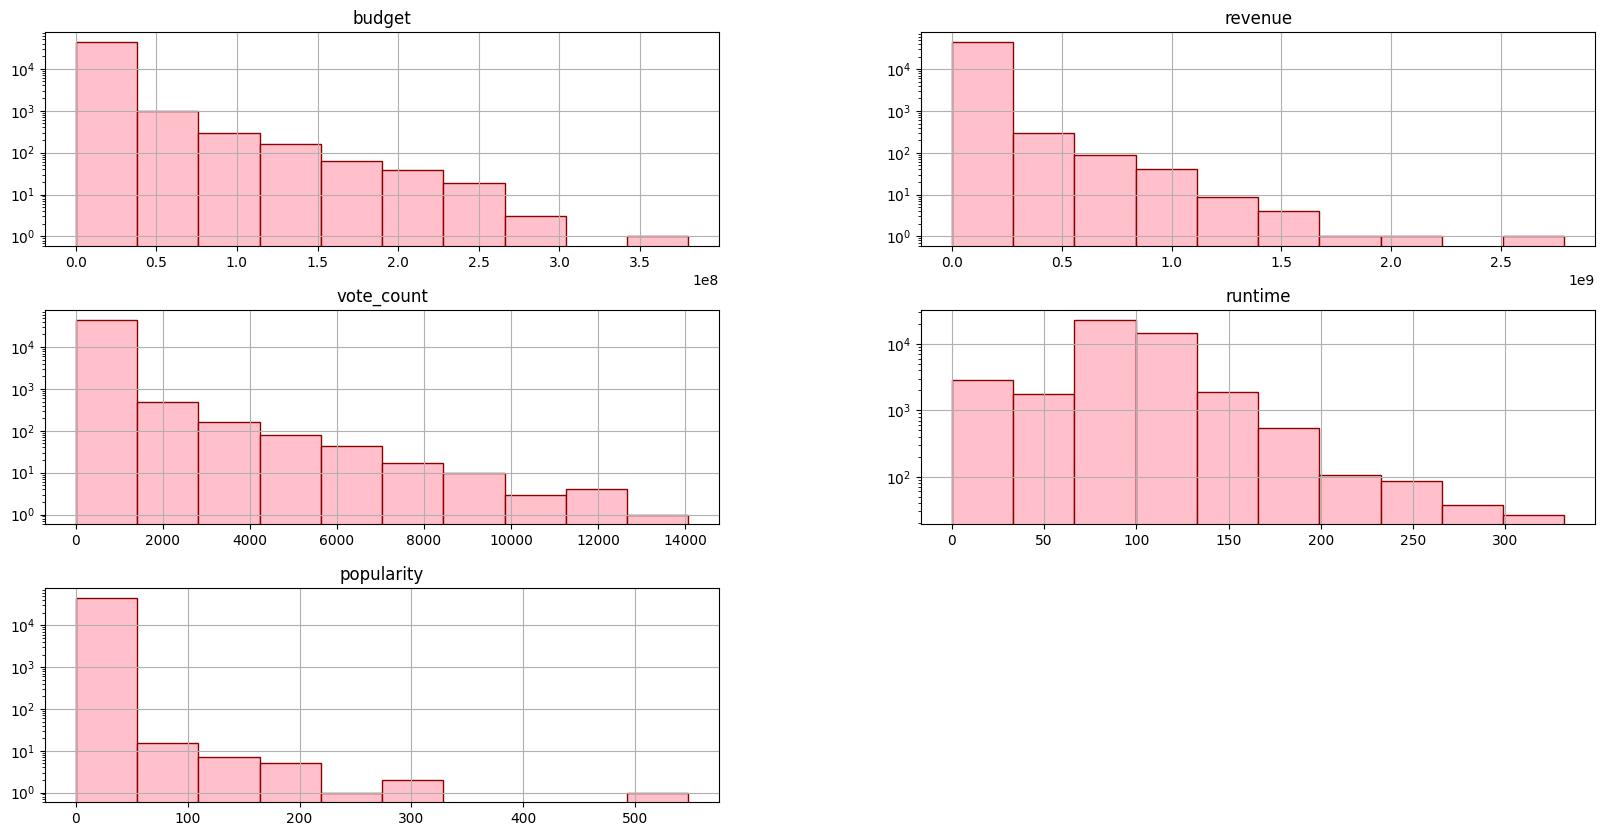

In [193]:
# Se verifica el arreglo del sesgo extremo en la columna runtime y se grafican los histogramas corregidos
movies_df_parquet_EDA[['budget', 'revenue', 'vote_count','runtime','popularity']].hist(
    figsize=(20, 10), 
    log=True, 
    color='pink', 
    edgecolor='darkred'
)

plt.show()

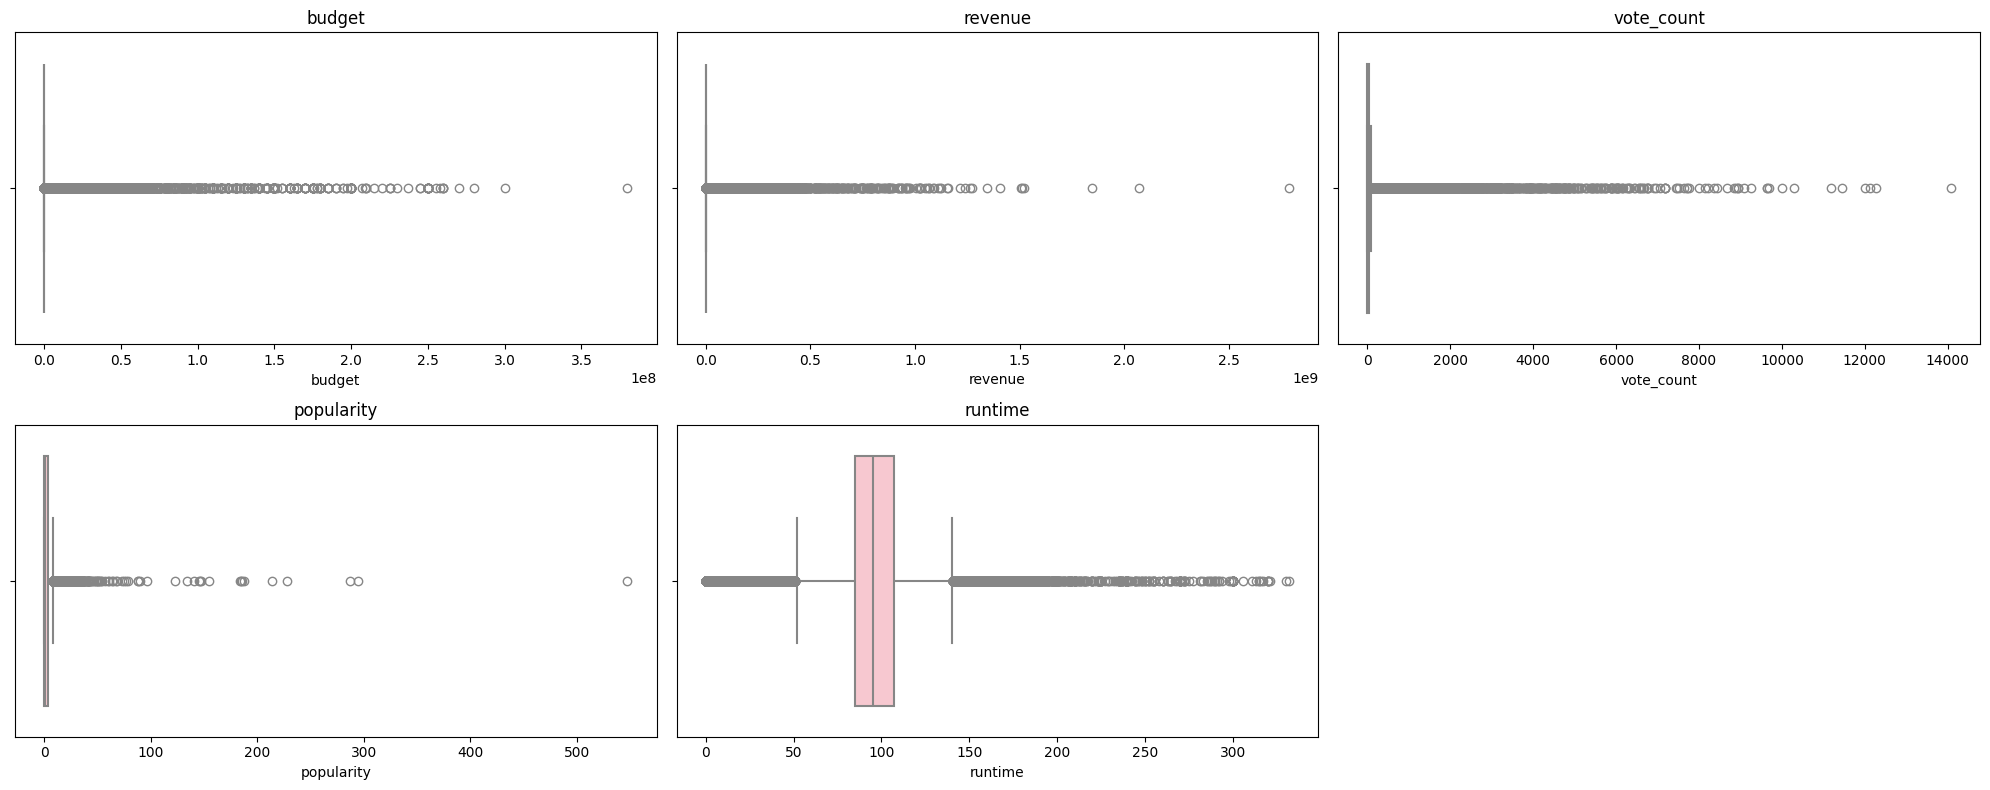

In [195]:
# Se verifican los sesgos corregidos
columns_to_analyze = ['budget', 'revenue', 'vote_count', 'popularity','runtime']

# Crear subplots para mostrar múltiples boxplots
plt.figure(figsize=(20, 8))

# Crear un boxplot para cada columna especificada
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(2, 3, i)  # Ajusta el número de filas y columnas (2 filas y 3 columnas)
    sns.boxplot(x=movies_df_parquet_EDA[column], color='pink', linewidth=1.5)
    plt.title(column)

plt.tight_layout()  # Asegura que los gráficos no se superpongan
plt.show()

### 5. Observar y mejorar la distribuicion en credits_df_parquet_EDA

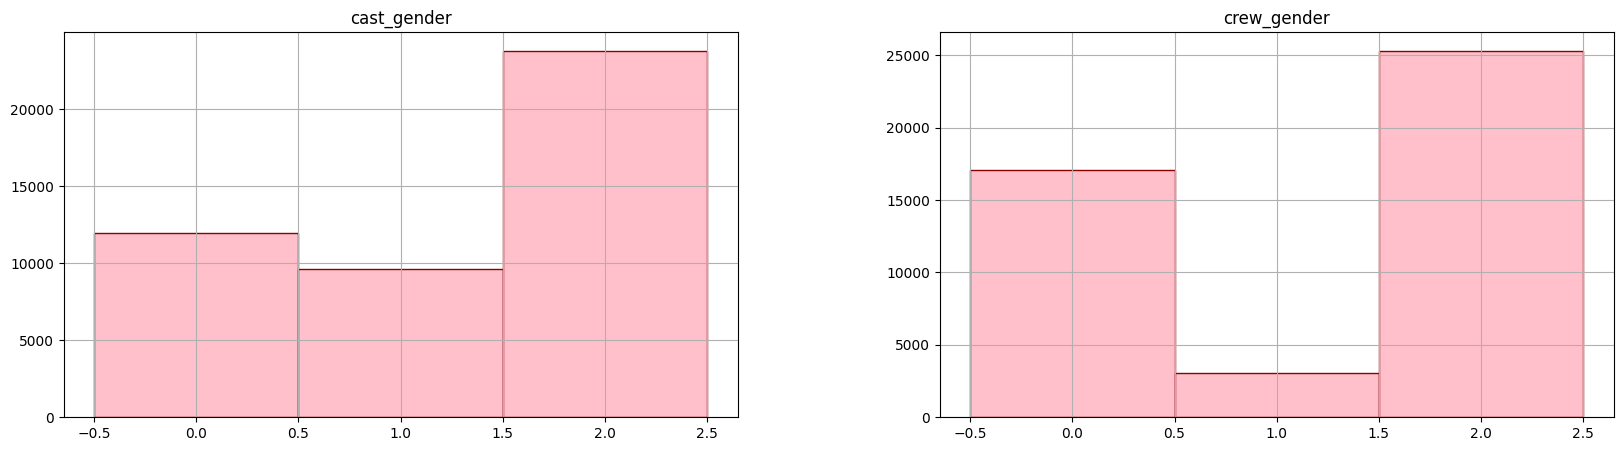

In [201]:
# Crear histograma para variables numéricas en 'credits_df_parquet_EDA' con barras rosas
credits_df_parquet_EDA[['cast_gender', 'crew_gender']].hist(
    bins=[-0.5, 0.5, 1.5, 2.5],  # Define bins para 0, 1 y 2
    figsize=(20, 5),
    color='pink',
    edgecolor='darkred'
)

plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Analisis de cada histograma:

* cast_gender (genero de los actores):

Eje X:
    0: Genero no especificado.
    1: Mujeres.
    2: Hombres.

Eje Y: Representa el conteo de cuántos registros caen en cada categoria de género.

Observación:    
    * Se observa que hay mas registros donde el género es hombre (2), El siguiente grupo mas grande corresponde a genero no especificado (0), seguido de mujeres (1).

* crew_gender (genero de la produccion):

Eje X:
    0: Genero no especificado.
    1: Mujeres.
    2: Hombres.

Eje Y: Representa el conteo de cuántos registros caen en cada categoria de género.

Observacion: 
    * Se observa que hay mas registros donde el género es hombre (2), el siguiente grupo mas grande corresponde a genero no especificado (0), seguido de un numero muy bajo de mujeres (1).

conclusion: los graficos muestran que hay mas hombres que mujeres tanto en el reparto como en el equipo de produccion, y muchos registros no tienen un genero especificado. Esto podría indicar una falta de datos completos o un sesgo en la informacion registrada sobre el genero, ademas se observa que ambos graficos presentan un sesgo bimodal teniendo picos en los hombres y el genero no especificado

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### 6. Verificacion de los outliers para credits_df_parquet_EDA

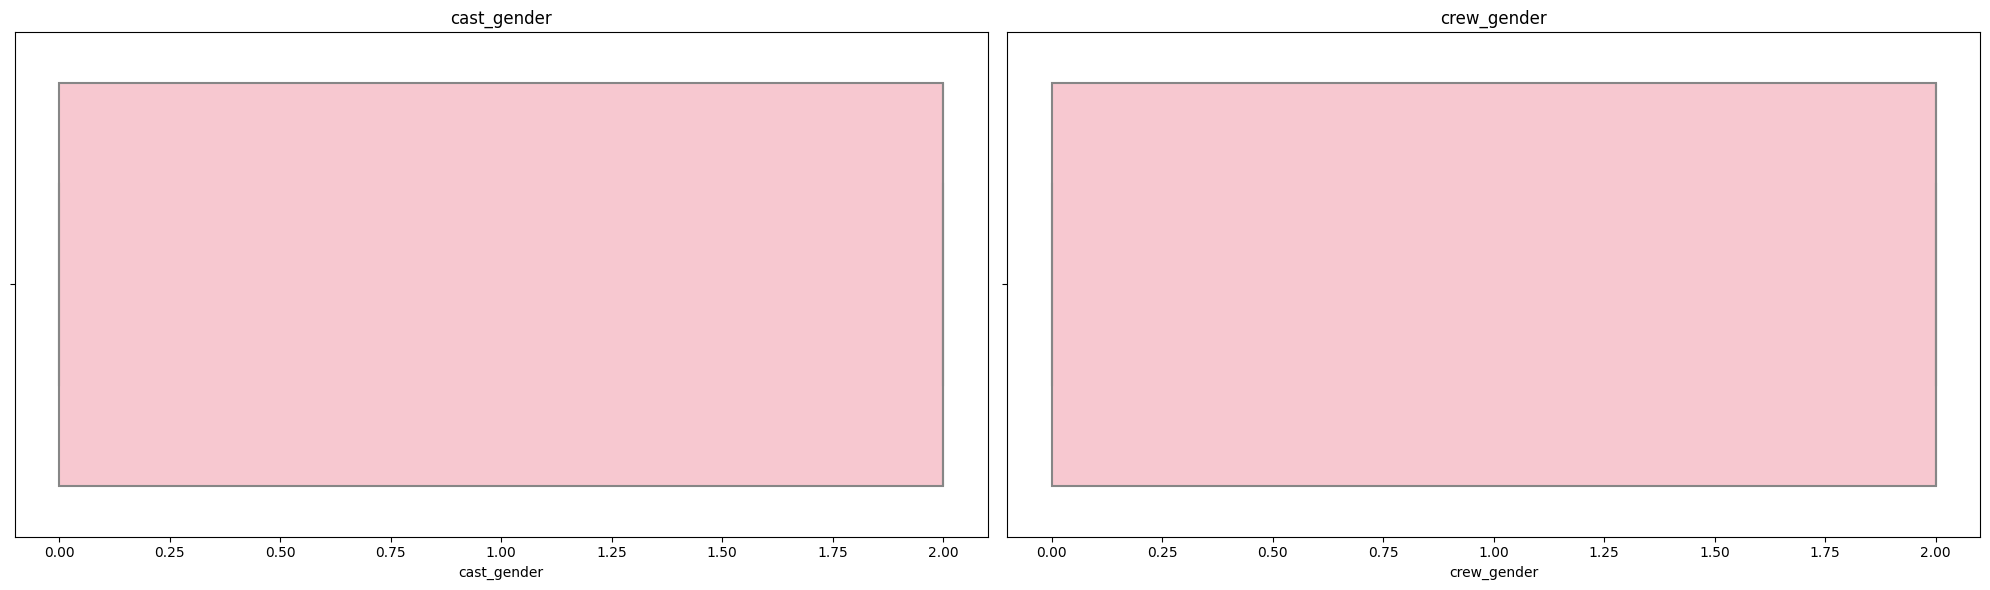

In [204]:
# Especificar las columnas que quieres analizar
columns_to_analyze = ['cast_gender', 'crew_gender']

# Crear subplots para mostrar múltiples boxplots
plt.figure(figsize=(20, 6))  # Ajusta el tamaño de la figura según el número de subplots

# Crear un boxplot para cada columna especificada
for i, column in enumerate(columns_to_analyze, 1):
    plt.subplot(1, 2, i)  # Ajusta el número de filas y columnas (1 fila y 2 columnas)
    sns.boxplot(x=credits_df_parquet_EDA[column], color='pink', linewidth=1.5)
    plt.title(column)

plt.tight_layout()  # Asegura que los gráficos no se superpongan
plt.show()

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### Analisis de los outliers:
* 'cast_gender' (género de los actores):
El boxplot muestra la presencia de registros en las tres categorías (0: Género no especificado, 1: Mujeres, 2: Hombres),No parece haber outliers significativos, ya que la mayoría de los puntos se agrupan dentro de los rangos esperados.

* 'crew_gender' (género del equipo de produccion):
Al igual que con 'cast_gender', El boxplot muestra la presencia de registros en las tres categorías (0: Género no especificado, 1: Mujeres, 2: Hombres), No se observan outliers significativos ya que la mayoría de los puntos se agrupan dentro de los rangos esperados.

* Conclusion:
No se realiza ningun ajuste respecto a outliers ya que estas columnas no presentan ese tipo de problema

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------